# 📝 Project Title: Machine Learning Model Building and Analyzing the Impact of Social Media Usage on Student Relationships and Mental Health using  


# 📖 Project Description:
In this project, I build a Model and analyzed a dataset on students’ social media usage habits, mental health scores, and relationship dynamics to determine which factors most influence social media addiction.

Using exploratory data analysis (EDA) and multiple machine learning regression models, I built a predictive system that estimates a student’s Addicted_Score based on various behavioral, psychological, and demographic features.

The goal was to:

Understand patterns in student social media usage

Identify the strongest predictors of addiction

Compare the effectiveness of different regression models

Apply hyperparameter tuning to optimize model performance

#Importing the Libraries

In [135]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

#1. Data Loading & Initial Exploration

Imported the dataset Students Social Media Addiction.csv
Inspected structure using .head(), .info(), .describe()

In [136]:
df = pd.read_csv('Students Social Media Addiction.csv')

In [137]:
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [139]:
df.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


#2. Data Cleaning & Preparation

Dropped irrelevant column: Student_ID

Verified no missing values in the dataset

Identified and listed:

🧮 Numeric columns (e.g., Age, Usage Hours, Mental Health Score)

🔠 Categorical columns (e.g., Gender, Country, Platform)





In [140]:
df.isnull().sum()

,0
Student_ID,0
Age,0
Gender,0
Academic_Level,0
Country,0
Avg_Daily_Usage_Hours,0
Most_Used_Platform,0
Affects_Academic_Performance,0
Sleep_Hours_Per_Night,0
Mental_Health_Score,0


In [141]:
df = df.drop('Student_ID',axis = 1)

# 3. Exploratory Data Analysis (EDA)
Used boxplots and histograms to visualize distributions and outliers

Plotted count plots for categorical distributions

Assessed skewness using histograms and KDE

Created a correlation heatmap (after label encoding) to study feature relationships

In [142]:
numeric_columns = ['Age','Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']
categorical_columns =  ['Gender', 'Academic_Level', 'Country', 'Most_Used_Platform', 'Affects_Academic_Performance','Relationship_Status']

In [143]:
for each_cols in df.columns:
  print(each_cols, ' -> ', df[each_cols].nunique())

Age  ->  7
Gender  ->  2
Academic_Level  ->  3
Country  ->  110
Avg_Daily_Usage_Hours  ->  67
Most_Used_Platform  ->  12
Affects_Academic_Performance  ->  2
Sleep_Hours_Per_Night  ->  59
Mental_Health_Score  ->  6
Relationship_Status  ->  3
Conflicts_Over_Social_Media  ->  6
Addicted_Score  ->  8


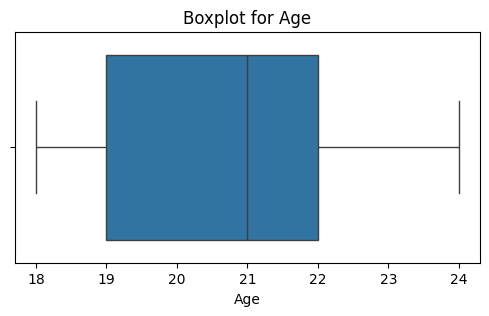

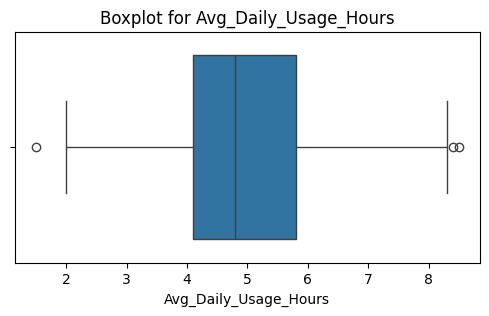

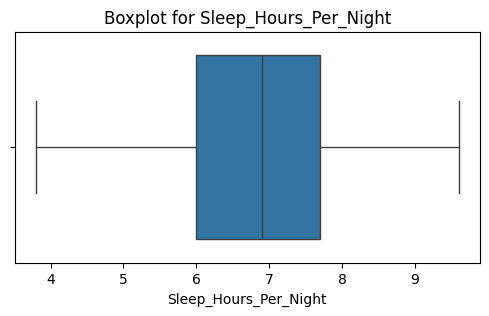

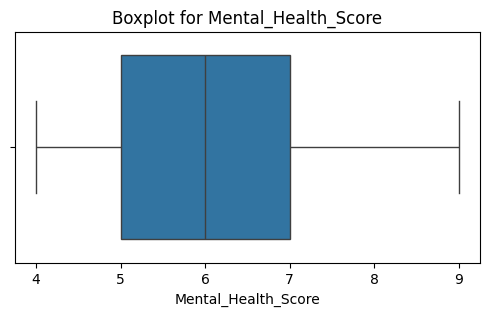

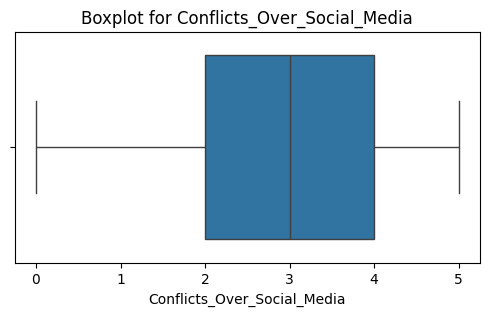

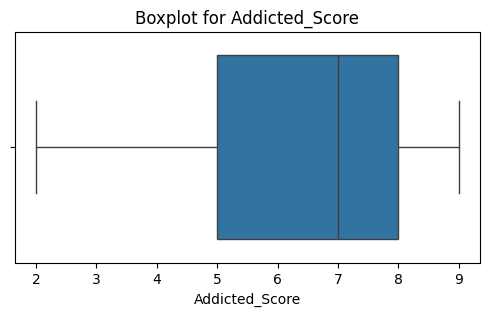

In [144]:
for col in numeric_columns:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()
    print('\n')

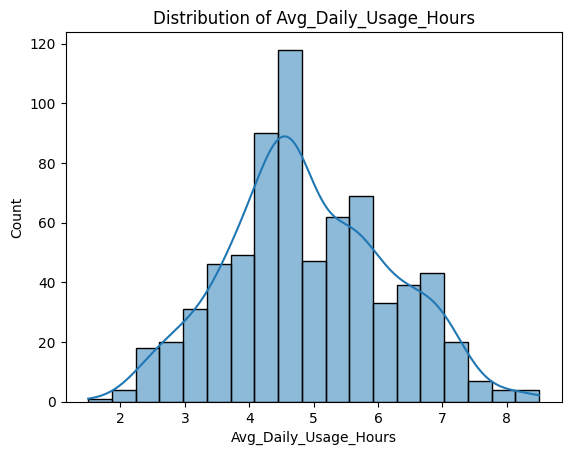

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Avg_Daily_Usage_Hours'], kde=True)
plt.title("Distribution of Avg_Daily_Usage_Hours")
plt.show()

In [146]:
from scipy.stats import skew

skewness = skew(df['Avg_Daily_Usage_Hours'])
print("Skewness:", skewness)

Skewness: 0.16428326671539786


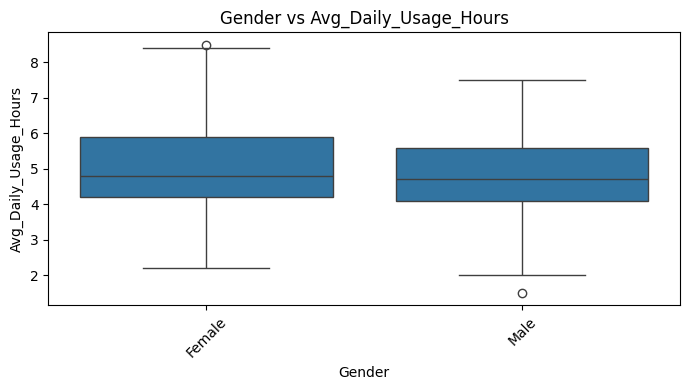

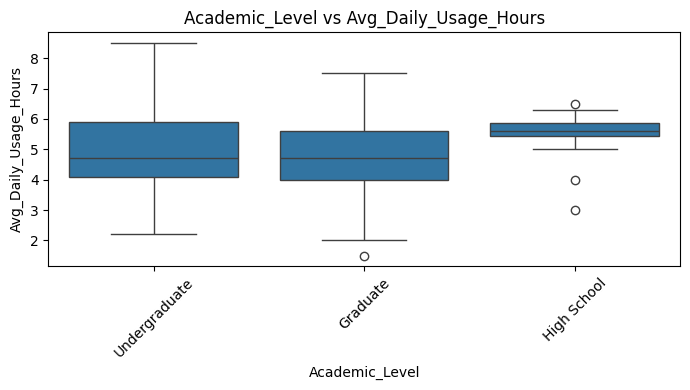

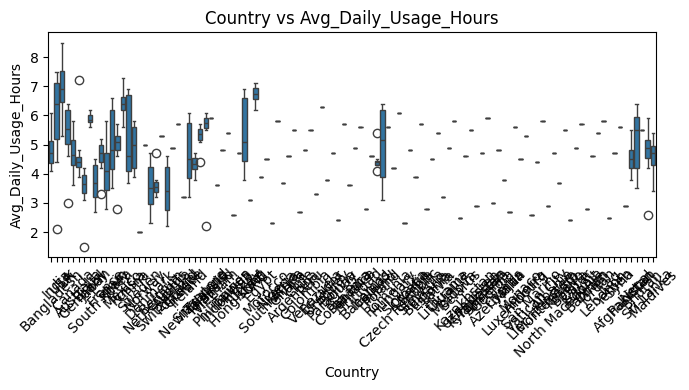

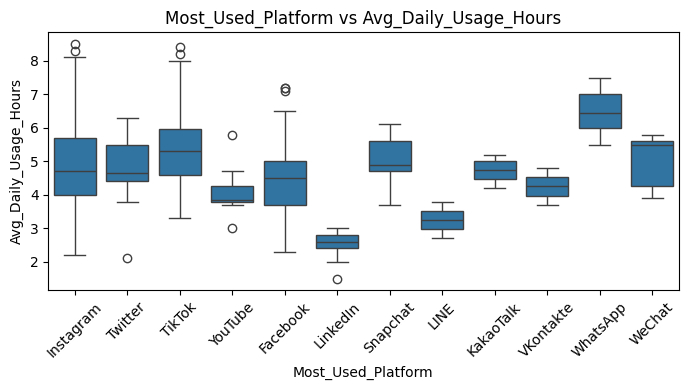

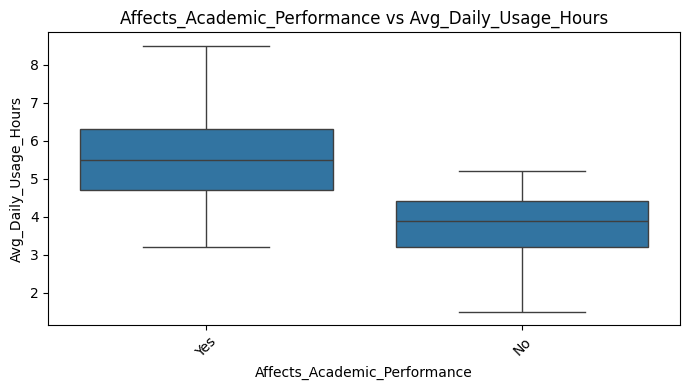

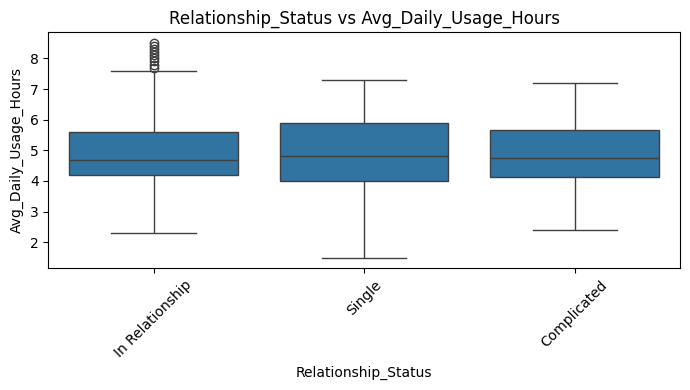

In [147]:
for col in categorical_columns:
    plt.figure(figsize=(7, 4))
    sns.boxplot(data=df, x=col, y='Avg_Daily_Usage_Hours')
    plt.title(f'{col} vs Avg_Daily_Usage_Hours')
    plt.xticks(rotation=45)  # Rotate x-labels for readability
    plt.tight_layout()
    plt.show()

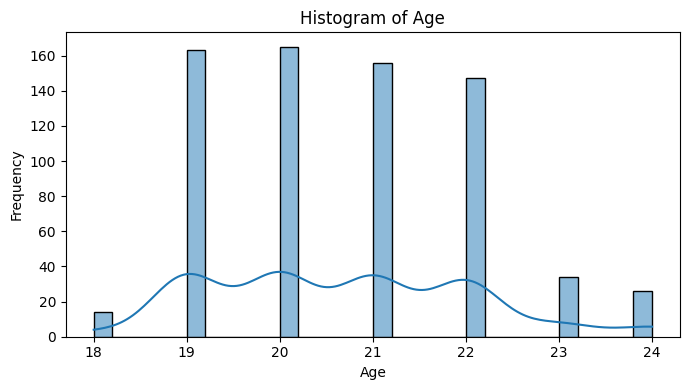

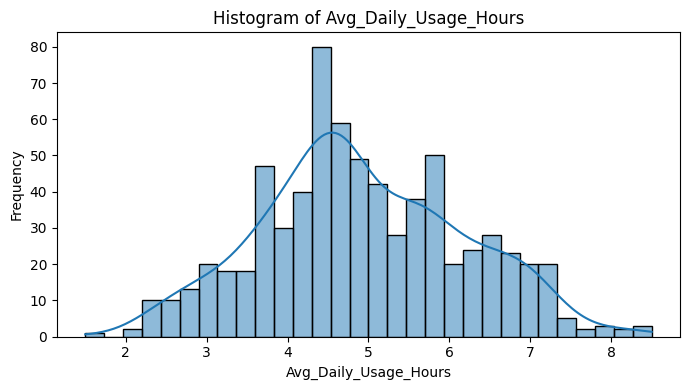

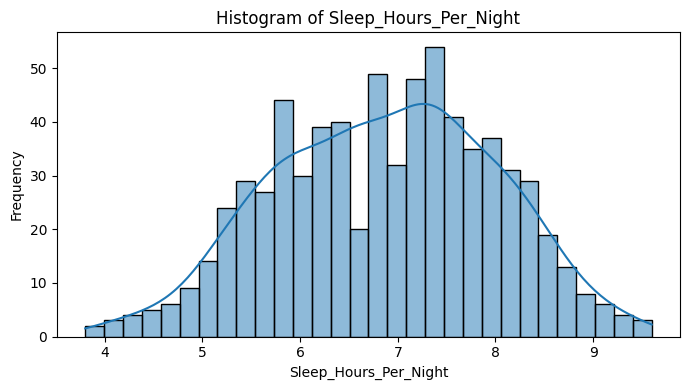

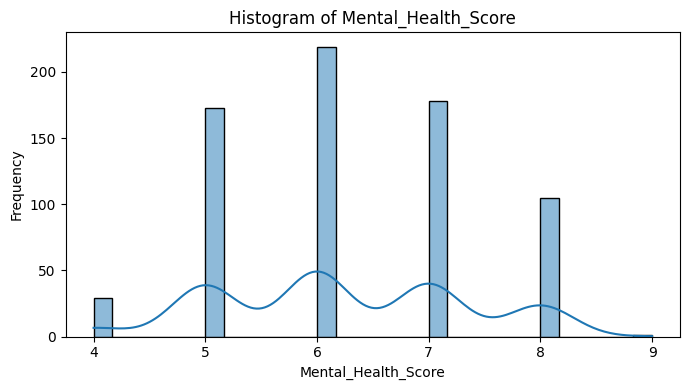

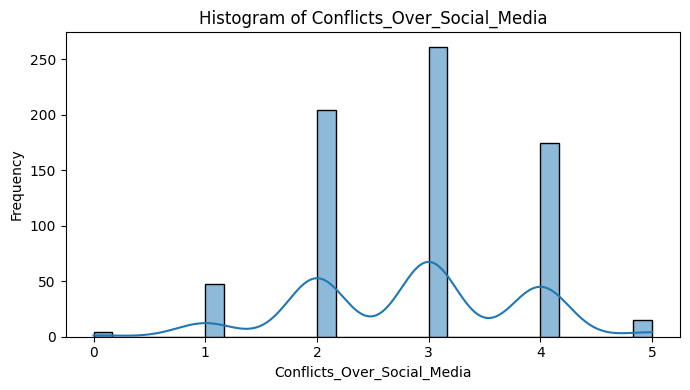

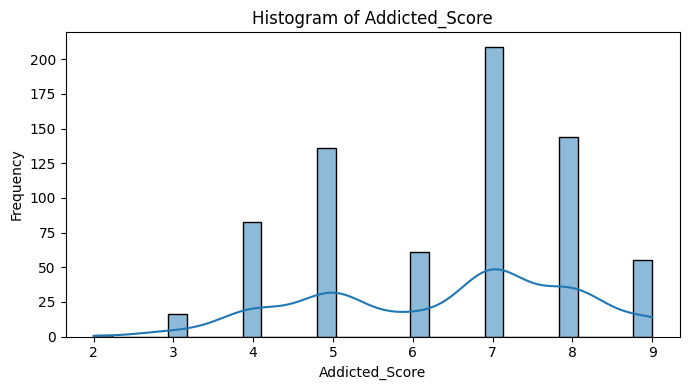

In [148]:
for col in numeric_columns:
    plt.figure(figsize=(7, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

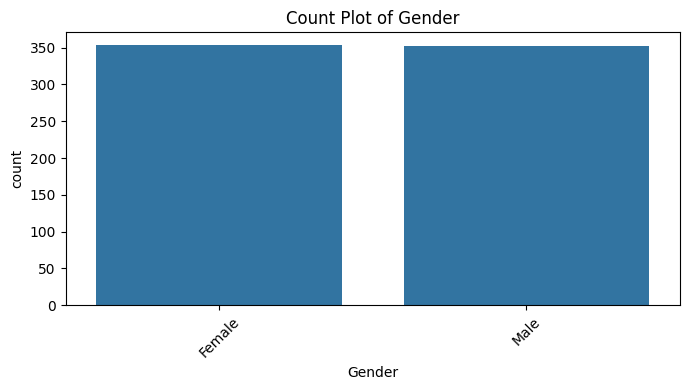

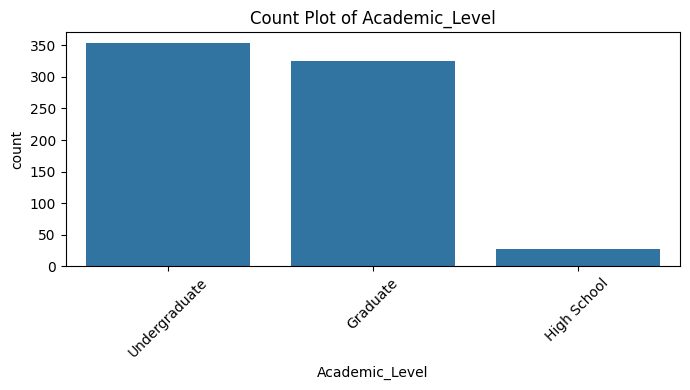

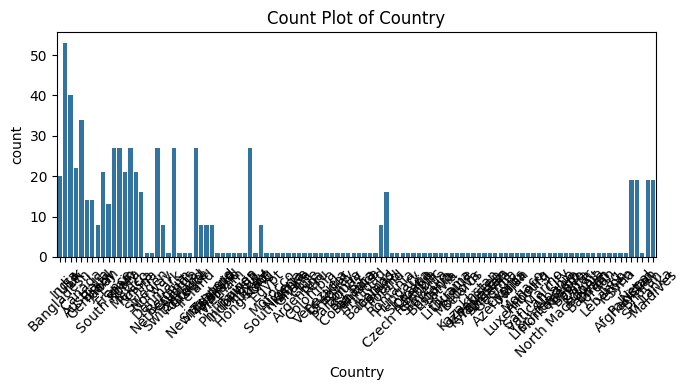

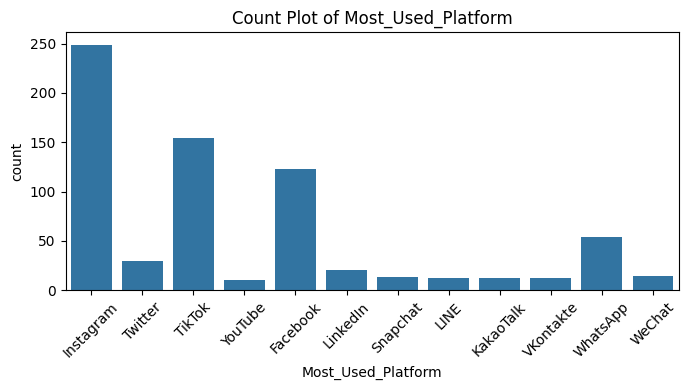

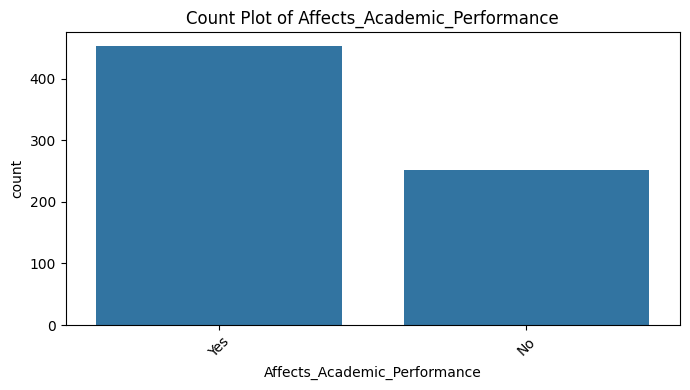

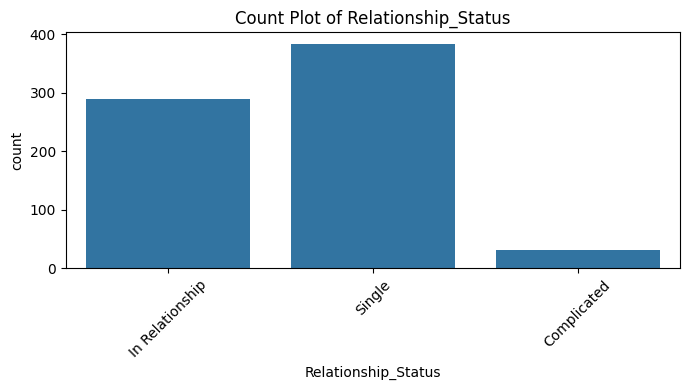

In [149]:
for col in categorical_columns:
    plt.figure(figsize=(7, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)  # Rotate for readability
    plt.tight_layout()
    plt.show()

In [150]:
df_encoded = df.copy()
le = LabelEncoder()
for col in categorical_columns:
  df_encoded[col] = le.fit_transform(df_encoded[col])

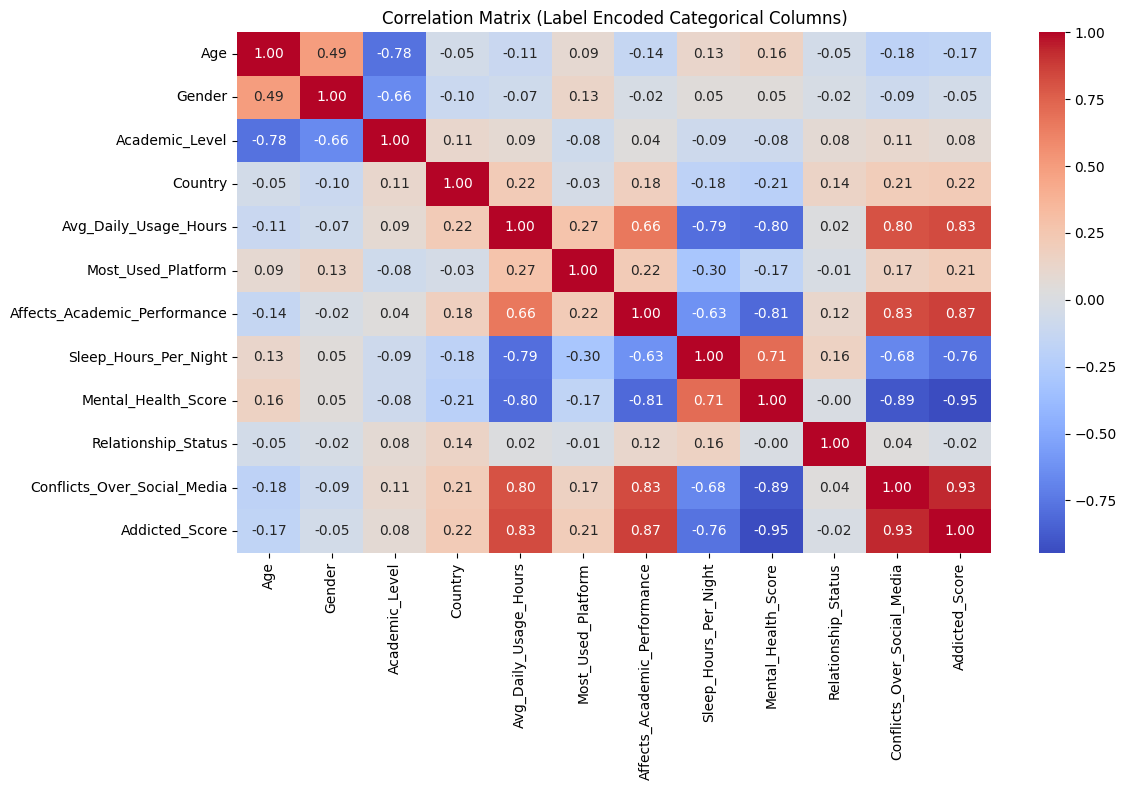

In [151]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix (Label Encoded Categorical Columns)")
plt.tight_layout()
plt.show()

#4. Top Feature Identification Using Random Forest
Used RandomForestRegressor to find feature importances

Selected top features based on importance score

Found features like Mental_Health_Score, Avg_Daily_Usage_Hours, Sleep_Hours_Per_Night were most influential for predicting Addicted_Score

In [152]:
# 1. Split data to identify top features
X = df_encoded.drop('Addicted_Score', axis=1)
y = df_encoded['Addicted_Score']

X_full_train, X_full_test, y_full_train, y_full_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rfg_model = RandomForestRegressor(random_state=42)
rfg_model.fit(X_full_train,y_full_train)

feature_importances = pd.DataFrame({
    'Feature': X_full_train.columns,
    'Importance': rfg_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

 # Display top features
top_features = feature_importances['Feature'].tolist()
print(len(top_features))
print("Top Features Selected:", top_features)

11
Top Features Selected: ['Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Country', 'Sleep_Hours_Per_Night', 'Most_Used_Platform', 'Avg_Daily_Usage_Hours', 'Affects_Academic_Performance', 'Age', 'Relationship_Status', 'Gender', 'Academic_Level']


In [153]:
for col in categorical_columns:
  if col in top_features:
    pass
  else:
      categorical_columns.remove(col)

for col in numeric_columns:
  if col in top_features:
    pass
  else:
    numeric_columns.remove(col)


#5. Feature Engineering
Applied:

Label Encoding for ordinal features (like Academic Level)

One-Hot Encoding for nominal categorical features (like Country, Platform)

Scaled only numerical features using StandardScaler (Since the Data is Normally Distributed)

In [154]:
# One-Hot Encode categorical columns and update the same DataFrame
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Confirm the transformation
print("New shape of df after one-hot encoding:", df.shape)
print("Sample columns:", df.columns.tolist())

New shape of df after one-hot encoding: (705, 132)
Sample columns: ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score', 'Gender_Male', 'Academic_Level_High School', 'Academic_Level_Undergraduate', 'Country_Albania', 'Country_Andorra', 'Country_Argentina', 'Country_Armenia', 'Country_Australia', 'Country_Austria', 'Country_Azerbaijan', 'Country_Bahamas', 'Country_Bahrain', 'Country_Bangladesh', 'Country_Belarus', 'Country_Belgium', 'Country_Bhutan', 'Country_Bolivia', 'Country_Bosnia', 'Country_Brazil', 'Country_Bulgaria', 'Country_Canada', 'Country_Chile', 'Country_China', 'Country_Colombia', 'Country_Costa Rica', 'Country_Croatia', 'Country_Cyprus', 'Country_Czech Republic', 'Country_Denmark', 'Country_Ecuador', 'Country_Egypt', 'Country_Estonia', 'Country_Finland', 'Country_France', 'Country_Georgia', 'Country_Germany', 'Country_Ghana', 'Country_Greece', 'Country_Hong Kong', 'Country_Hungary', 'Country_Icela

In [155]:
scaler = StandardScaler()
# Scale the numeric columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

 # 6. Train-Test Split
Split data into 77% training and 23% test sets

In [156]:
# Define features and target
X = df.drop('Addicted_Score', axis=1)
y = df['Addicted_Score']

# Split into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.23, random_state=42
)

# Confirm the shapes
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (542, 131) (542,)
Test shape: (163, 131) (163,)


# 7. Model Building
Trained the following regression models:

Linear Regression

Support Vector Regression (SVR)

Random Forest Regressor

In [157]:
# Initialize models
lr_model = LinearRegression()
svmr_model = SVR()
rfr_model = RandomForestRegressor(random_state=42)

In [158]:
# Train models
lr_model.fit(X_train, y_train)
svmr_model.fit(X_train, y_train)
rfr_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [159]:
# Predict
lr_preds = lr_model.predict(X_test)
svmr_preds = svmr_model.predict(X_test)
rfr_preds = rfr_model.predict(X_test)

# 8. Model Evaluation
Evaluated using:

R² Score

MAE (Mean Absolute Error)

RMSE (Root Mean Squared Error)

In [160]:
def evaluate_model(name, y_true, y_pred):
    print(f"🔍 {name} Evaluation:")
    print("R2 Score:       ", r2_score(y_true, y_pred))
    print("MAE:            ", mean_absolute_error(y_true, y_pred))
    print("MSE:            ", mean_squared_error(y_true, y_pred))
    print("RMSE:           ", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("-" * 40)

# Evaluate all
evaluate_model("Linear Regression", y_test, lr_preds)
evaluate_model("Support Vector Regression", y_test, svmr_preds)
evaluate_model("Random Forest Regressor", y_test, rfr_preds)

🔍 Linear Regression Evaluation:
R2 Score:        0.9521840706248997
MAE:             0.23457306029796893
MSE:             0.11987006631630569
RMSE:            0.34622256760111075
----------------------------------------
🔍 Support Vector Regression Evaluation:
R2 Score:        0.9781958371746172
MAE:             0.12511493689268507
MSE:             0.05466099850003545
RMSE:            0.23379691721670637
----------------------------------------
🔍 Random Forest Regressor Evaluation:
R2 Score:        0.9879199981983605
MAE:             0.04736196319018404
MSE:             0.03028343558282211
RMSE:            0.17402136530559145
----------------------------------------


# 9. Hyperparameter Tuning (Validation Step)
Used GridSearchCV to tune the Random Forest:

Best Parameters:
{ 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100 }

In [161]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
# Initialize the model
rfr_model = RandomForestRegressor(random_state=42)

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rfr_model, param_grid=param_grid,
                           cv=5, scoring='r2', n_jobs=-1, verbose=1)

# Fit on training data only
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_

# Print best parameters
print("🔧 Best Hyperparameters:")
print(grid_search.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
🔧 Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [162]:
# Predict on test set
rf_tuned_preds = best_rf.predict(X_test)

# 10. Final Model Evaluation
Tuned Random Forest performed similarly to default:

R²: 0.98~

MAE: 0.04~ or 0.02~

RMSE: 0.1~

Just Slight improvement in MAE, consistent overall performance.

In [163]:
# Evaluate
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

print("🔍 Tuned Random Forest Evaluation:")
print("R² Score:       ", r2_score(y_test, rf_tuned_preds))
print("MAE:            ", mean_absolute_error(y_test, rf_tuned_preds))
print("RMSE:           ", np.sqrt(mean_squared_error(y_test, rf_tuned_preds)))

🔍 Tuned Random Forest Evaluation:
R² Score:        0.9877987992823469
MAE:             0.048128834355828216
RMSE:            0.17489216660173865


# Conclusion:
The dataset was clean and balanced enough for effective modeling.

Random Forest Regressor gave the best prediction accuracy on Addicted_Score.

Feature importance and EDA revealed mental health, usage hours, and sleep as major influencing factors.

The model can help educational institutes predict social media impact and act on student well-being insights.